# Part 1: Image Mosiacing 

In [117]:
#Installing libraries  
import cv2 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import csv 
import itertools
import os


In [134]:
ls 

 2018122008_CV1/      opt.jpeg
 2018122008_CV1.zip   project.png
 A2.ipynb            'q1(1).ipynb'
 A2_Part2.ipynb       q2.ipynb
 Assignment2.pdf     'Screenshot from 2020-02-29 23-24-39.png'
 homomat.png          stereo_images/
 image_mosaicing/


In [114]:
# Reading few images for testing . 

i11=cv2.imread('//home//niharika//CV_A2//ComputerAssignment2//image_mosaicing//img1_1.jpg')
i12=cv2.imread('//home//niharika//CV_A2//ComputerAssignment2//image_mosaicing//img1_2.jpg')
i13=cv2.imread('//home//niharika//CV_A2//ComputerAssignment2//image_mosaicing//img1_3.jpg')

i11 = i11.astype('uint8')
i12 = i12.astype('uint8')
i13 = i12.astype('uint8')


i21=cv2.imread('//home//niharika//CV_A2//ComputerAssignment2//image_mosaicing//img2_1.jpg')
i22=cv2.imread('//home//niharika//CV_A2//ComputerAssignment2//image_mosaicing//img2_2.jpg')


* Procedure for Image Mosaicing

    * Use any feature detector and descriptor (e.g. SIFT) to find matches between two partially overlapping images.
    * Estimate the homography matrix between the two images robustly.
    * Transform one of the images to the others reference frame using the homography matrix.
    * Stitch the two/multiple images together to produce a singly mosaic/panorama.



# SIFT 

* Function Description : 
    * Input  : Image List 
    * Output : Matching points co-ordinates 
    * Params : No.of.Octaves , No.of features , No.of scales, Default sigma value , default EdgeThreshold.
    * Goal :   Returns list sift keypoints and their discriptors for each image
    

In [109]:
def siftfeatures(img,verbose=False):
    sift=cv2.xfeatures2d.SIFT_create()
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #half = cv2.resize(gray,(0,0), fx = 0.2, fy = 0.2)
    kp, des = sift.detectAndCompute(gray,None)
    if(verbose): 
        I=cv2.drawKeypoints(gray,kp,img)
        fig=plt.figure(figsize=[7,7])
        plt.imshow(I)
        plt.imshow(img)
        plt.title("Orginal Image vs Image with Keypoints")
    return kp,des

In [110]:
k,d=siftfeatures(i11,False)

In [47]:
def featurematchingknn(img1,img2,verbose=False):
    
    bf=cv2.BFMatcher(cv2.NORM_L2,False)
    
    kp1,des1=siftfeatures(img1,verbose=False)
    kp2,des2=siftfeatures(img2,verbose=False)
    
 
    rawmatches = bf.knnMatch(des1,des2,k=2)
    
    matches = []


    for a,b in rawmatches:
        if a.distance < 0.4 * b.distance:
            matches.append(a)
        
    
    dp = dict(matchColor = (0,255,0), singlePointColor = None, flags=2)
    
    if(verbose):
        img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, **dp) 
        fig=plt.figure(figsize=[10,10])
        plt.imshow(img3)
        plt.title("Features Matched")
        plt.show()
        
    # Points Generation . 
    pts1=np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,2)
    pts2=np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,2)
    
    return(matches,kp1,kp2,pts1,pts2)
    

In [48]:
M,kp1,kp2,p1,p2=featurematchingknn(i11,i12)

In [143]:
print(M)

[<DMatch 0x7f7bf764ccd0>, <DMatch 0x7f7bf759d5d0>, <DMatch 0x7f7bf759f210>, <DMatch 0x7f7bf751b150>, <DMatch 0x7f7bf751f190>, <DMatch 0x7f7bf751f610>, <DMatch 0x7f7bf7524250>, <DMatch 0x7f7bf7524590>, <DMatch 0x7f7bf7526b50>, <DMatch 0x7f7bf7528b50>, <DMatch 0x7f7bf7531cd0>, <DMatch 0x7f7bf7534190>, <DMatch 0x7f7bf7536790>, <DMatch 0x7f7bf7536ed0>, <DMatch 0x7f7bf753a950>, <DMatch 0x7f7bf753f610>, <DMatch 0x7f7bf74c1190>, <DMatch 0x7f7bf74c1a90>, <DMatch 0x7f7bf74c1b10>, <DMatch 0x7f7bf74c1dd0>, <DMatch 0x7f7bf74c3d90>, <DMatch 0x7f7bf74c8c90>, <DMatch 0x7f7bf74ca1d0>, <DMatch 0x7f7bf74ca410>, <DMatch 0x7f7bf74ca450>, <DMatch 0x7f7bf74ca550>, <DMatch 0x7f7bf74cae50>, <DMatch 0x7f7bf74ccb50>, <DMatch 0x7f7bf74ccbd0>, <DMatch 0x7f7bf74cf2d0>, <DMatch 0x7f7bf74cfa90>, <DMatch 0x7f7bf74d1e10>, <DMatch 0x7f7bf74d1ed0>, <DMatch 0x7f7bf74d31d0>, <DMatch 0x7f7bf74d3ed0>, <DMatch 0x7f7bf74d5810>, <DMatch 0x7f7bf74d8d90>, <DMatch 0x7f7bf74d8dd0>, <DMatch 0x7f7bf74d8e90>, <DMatch 0x7f7bf74da990>,

In [51]:
print(p1)


[[1611.3243  1417.2225 ]
 [1802.5352   486.84644]
 [1805.084   1751.3333 ]
 [2531.668   1212.8385 ]
 [2626.0342   726.9135 ]
 [2629.946    724.9381 ]
 [2783.2393   515.9693 ]
 [2796.5212   897.42316]
 [2858.858    785.7481 ]
 [2891.6672  1098.9193 ]
 [2977.1077   845.35443]
 [2986.5295   364.41498]
 [3023.5447  1108.6656 ]
 [3033.4033  1265.4741 ]
 [3072.2756   402.9906 ]
 [3106.441   1123.1858 ]
 [3129.2312   543.4589 ]
 [3149.3994   320.3122 ]
 [3151.9324   639.18024]
 [3166.5     1285.8274 ]
 [3198.6062   492.2323 ]
 [3241.1794   755.7637 ]
 [3251.712    557.52966]
 [3262.9517   491.8362 ]
 [3262.9517   491.8362 ]
 [3267.7915   320.90384]
 [3295.181    628.1322 ]
 [3310.7869   864.79706]
 [3313.2615  1043.8665 ]
 [3324.6282  1031.8832 ]
 [3337.2156  1228.5612 ]
 [3362.5103   407.93185]
 [3364.6892   320.5594 ]
 [3366.0808   507.04993]
 [3396.679    557.4627 ]
 [3405.4297   639.5345 ]
 [3447.6958   317.56317]
 [3447.6958   317.56317]
 [3449.2217   220.4056 ]
 [3464.8853   143.00215]


In [52]:
print(p2)

[[ 137.59773 1404.2678 ]
 [ 393.60364  355.68314]
 [ 392.33047 1774.9584 ]
 [1250.9661  1168.2928 ]
 [1364.7776   667.40405]
 [1364.7776   667.40405]
 [1522.2789   467.71664]
 [1527.0083   845.5751 ]
 [1595.9198   738.70984]
 [1628.6527  1052.8185 ]
 [1714.3561   795.0401 ]
 [1728.5206   327.36203]
 [1760.6896  1066.255  ]
 [1766.844   1215.1857 ]
 [1812.063    371.81006]
 [1840.6747  1080.1641 ]
 [1861.0332   533.71967]
 [1888.9905   295.5828 ]
 [1886.6433   608.2206 ]
 [1893.0728  1236.1671 ]
 [1934.5171   469.0611 ]
 [1964.6915   727.3267 ]
 [1983.3197   532.76337]
 [1993.1677   471.23453]
 [1993.1677   471.23453]
 [1997.0541   305.52472]
 [2016.5283   607.57574]
 [2029.8035   830.60596]
 [2030.711   1006.3004 ]
 [2041.4695   993.9947 ]
 [2053.4968  1179.6646 ]
 [2084.8428   397.02573]
 [2090.1965   312.66953]
 [2088.8923   489.03455]
 [2116.787    541.7838 ]
 [2116.178    608.5197 ]
 [2164.7773   317.2055 ]
 [2164.7773   317.2055 ]
 [2167.3      224.38814]
 [2176.893    151.09468]


<img src="homomat.png" width="400">

In [70]:
def computeRow(pointP,pointQ):
    row1=[-pointP[0],-pointP[1],-1,0,0,0,pointP[0]*pointQ[0],pointP[1]*pointQ[0],pointQ[0]]
    row2=[0,0,0,-pointP[0],-pointP[1],-1,pointP[0]*pointQ[1],pointP[1]*pointQ[1],pointQ[1]]
    
    return(np.vstack((row1,row2)))

#Testing the function .
A=computeRow([1,1],[1,1])
print(A)
print(A.shape)

[[-1 -1 -1  0  0  0  1  1  1]
 [ 0  0  0 -1 -1 -1  1  1  1]]
(2, 9)


In [92]:
def homographyMatrix(srcpts,despts):
    M=[]
    N=len(srcpts);
    for i in zip(srcpts,despts):
        A=computeRow(i[0],i[1])
        M.append(A)
    M=np.asarray(M)
    m,n,p=M.shape
    M=np.reshape(np.asarray(M),(m*n,p))
    
    # Computing the SVD part .
    U, D, V_T =np.linalg.svd(M)
    #Extrating the last column of V
    H=np.reshape(V_T[-1,:]/V_T[-1,-1],(3,3))
    
    # MSE Error . 
    # Calculating the Mean error now , as H is known to us . 
    # Take up all world co-ordinates ,mul by H , we know the corresponding image co-ordinates .
    
    mse=0;
    despt_append=[ [despts[i][0],despts[i][1],1] for i in range(0,len(despts)) ] 
    
    for i in range(0,1,len(despts)) : 
        xcPred=np.dot(H,np.reshape(np.asarray(despt_append[i]),(3,1)));
        xcPred=xcPred[0:2]/xcPred[-1]
        mse=mse+np.linalg.norm((np.reshape(np.asarray(despts[i]),(2,1))-xcPred))
        
    mse=mse/len(despts)
    return(H,mse)

In [101]:
def homographyRANSAC(scrpts,despts,verbose=False):
    #For Computation  of Homography any 4 pts are enough.
    scrpts=list(scrpts)
    despts=list(despts)
    N=len(scrpts)
    
    if(N<4):
        print('Homography cannot be computed , pls enter more points')
        return(0);
    
    mse_max=1000000;
    for subset in itertools.combinations(range(0,N),4):
        Si=[scrpts[i] for i in subset]
        Di=[despts[i] for i in subset]
        # Calling Homography Function . 
        Hi,erri=homographyMatrix(Si,Di)
        if(erri<mse_max):
            H,mse=homographyMatrix(Si,Di)
            msemax=mse
    return(H,mse)             

In [144]:
H,mse=homographyMatrix(p1,p2)
print(H)

[[ 1.69197263e+00 -1.63722968e-03 -2.54683749e+03]
 [ 1.69218993e-01  1.44760102e+00 -5.61388706e+02]
 [ 1.49700749e-04  7.52003600e-06  1.00000000e+00]]


In [111]:
def warp_project(imageA, imageB, homography,verbose=True):    
    h1, w1 = imageA.shape[:2]
    h2, w2 = imageB.shape[:2]
    pts1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    pts2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    
    pts2_ = cv2.perspectiveTransform(pts2, homography)
    pts = np.concatenate((pts1, pts2_), axis=0)
    
    [xmin, ymin] = np.int8(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int8(pts.max(axis=0).ravel() + 0.5)
    t = [-xmin, -ymin]
    Ht = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])
    result = cv2.warpPerspective(imageB, Ht.dot(homography), (xmax-xmin, ymax-ymin))
    cv2.imwrite("project.png", result)
    result[t[1]:h1+t[1], t[0]:w1+t[0]] = imageA
    
    if(verbose):
        fig=plt.figure(figsize=[10,10])
        gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
        plt.imshow(gray)
        plt.title('Stiched Image')
    return(result)

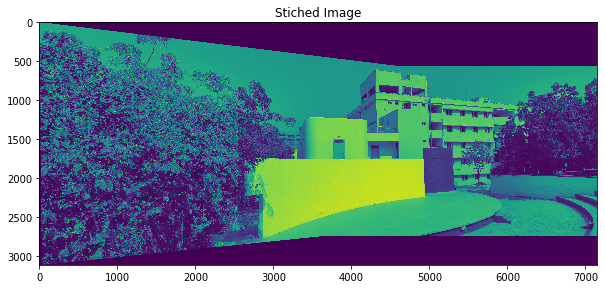

In [113]:
Q=warp_project(i12,i11,H,True)

# Part 4 : Image Mosiacing for multiple images 

In [135]:
# We use Q and I13 image and stich them together further . 

matches,kp1,kp2,pts1,pts2=featurematchingknn(Q,i13,verbose=False)
H_dash,err=homographyRANSAC(pts1[100:],pts2[100:])
warp_project(Q,i13,H_dash,verbose=True)

SyntaxError: invalid syntax (<ipython-input-135-5a9f383bb9bb>, line 6)

In [141]:
optimg=cv2.imread('opt.jpeg')
gray_opt= cv2.cvtColor(optimg, cv2.COLOR_RGB2GRAY)
cv2.imwrite('final.jpeg',gray_opt)

True

<img src="final.jpeg" width="400">